## 텐서플로우 라이브러리를 이용해 이미지 분류 모델을 간단하게 사용하는 코드.
사전학습된 모바일넷 모델을 불러와서 이미지 1장을 넣으면 이 이미지가 어떤 객체인지 판별함.

In [1]:
#pip install tensorflow
import tensorflow as tf
import tf2onnx

# MobileNet V3 모델 불러오기
model = tf.keras.applications.MobileNetV3Small(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
print(model)

In [ ]:
model.summary()

In [ ]:
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [ ]:
model.compile()

# 모델을 ONNX로 변환
onnx_model, _ = tf2onnx.convert.from_keras(model)

# ONNX 모델 저장
with open("mobilenet.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#pip install pillow
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import cv2 as cv

inputs = cv.imread('../imgs/viewimage.png', cv.IMREAD_COLOR)
original = inputs
inputs = tf.expand_dims(inputs, axis=0)
x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs)
x = tf.keras.applications.mobilenet_v3.preprocess_input(x)

In [ ]:
# 이미지 분류 예측
preds = model.predict(x)

In [ ]:
from tensorflow.keras.applications.mobilenet_v3 import decode_predictions

# 클래스 예측 결과 해석
results = decode_predictions(preds, top=3)[0]
for result in results:
    print(result[1], result[2])

49152/35363 [=========================================] - 0s 0us/step
Norwegian_elkhound 0.27006522
timber_wolf 0.16014177
keeshond 0.033834487


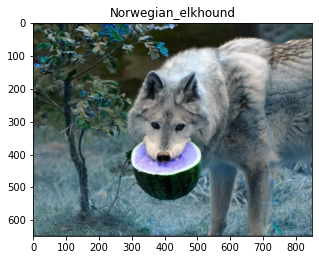

In [ ]:
# 예측 실행
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions

fig= plt.figure(figsize=(5,5))
plt.title(decode_predictions(preds, top=1)[0][0][1])# 타이틀에 예측 명 1순위를 넣는다.
plt.imshow(original)	# 이미지는 
plt.show()